In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
np.random.seed(1234)
N = 1000

#### data generating

The model:

$$
y_i = 1 + x_{1i} + x_{2i} + \epsilon_i
$$

where $x_{1i}$, $x_{2i}$, $ε_i$ are mutually independent normal random variables. $x_{1i}$ and $ε_i$ both have variance being 1, while the variance of $x_{2i}$ is 5.

In [32]:
# generating standard normal dist random numbers
x1 = np.random.normal(size=N)
x2 = np.random.normal(size=N, scale=5)
ε = np.random.normal(size=N)

y = 1 + x1 + x2 + ε

In [33]:
def OLS(X, y):
    
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [34]:
# full sample regression
X = np.empty((N, 3))

X[:, 0] = 1
X[:, 1] = x1
X[:, 2] = x2

β_hat = OLS(X, y)
ε_hat = y - X @ β_hat

#### Using 1000 times of sub sample regressions

In [35]:
β_list = np.empty((N, 3))

X_tilde = np.empty((N-1, 3))
X_tilde[:, 0] = 1
y_tilde = np.empty(N-1)

for i in range(N):
    X_tilde[:i, 1] = x1[:i]
    X_tilde[i:, 1] = x1[i+1:]
    X_tilde[:i, 2] = x2[:i]
    X_tilde[i:, 2] = x2[i+1:]
    y_tilde[:i] = y[:i]
    y_tilde[i:] = y[i+1:]
    
    β_list[i, :] = OLS(X_tilde, y_tilde)

In [36]:
β_list

array([[1.00160641, 0.99663891, 1.00922421],
       [1.00294931, 0.99641968, 1.00903121],
       [1.00384211, 0.99566911, 1.00886737],
       ...,
       [1.00265416, 0.99608286, 1.00886391],
       [1.00294671, 0.99644546, 1.00894716],
       [1.00362598, 0.99655945, 1.00899271]])

In [37]:
dist = np.sum((β_list - β_hat) ** 2, 1) # impact on xb
dist_x1 = np.abs(β_list - β_hat)[:, 1] # impact on beta1

In [38]:
influential_pts = sorted(range(1000), key=lambda x: dist[x], reverse=True)[:5]
influential_pts_x1 = sorted(range(1000), key=lambda x: dist_x1[x], reverse=True)[:5]

In [39]:
influential_pts

[88, 903, 935, 497, 924]

In [40]:
influential_pts_x1

[88, 935, 497, 903, 924]

Text(0.5,1,'Influential points')

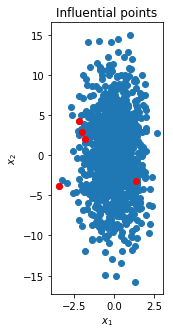

In [42]:
plt.figure(figsize=(2, 5))
plt.scatter(x1, x2)
plt.scatter(x1[influential_pts], x2[influential_pts], c='r')
    
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Influential points")

In [43]:
from mpl_toolkits.mplot3d import Axes3D

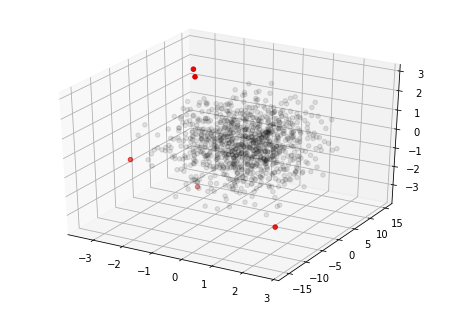

In [51]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, ε_hat, c='k', alpha=0.1)
ax.scatter(x1[influential_pts], x2[influential_pts], ε_hat[influential_pts], c='r')

#### Focusing on the impact of $x_i$

Impact on xβ

$$
x_{i}\hat{\beta}-x_{i}\hat{\beta}_{(i)}=\underbrace{\frac{x_{i}\left(X_{(i)}^{\prime}X_{(i)}\right)^{-1}x_{i}}{1+x_{i}^{\prime}\left(X_{(i)}^{\prime}X_{(i)}\right)^{-1}x_{i}}}\left(y_{i}-x_{i}^{\prime}\hat{\beta}_{(i)}\right)
$$

In [25]:
impact = np.empty(N)
for i in range(N):
    X_tilde[:i, 1] = x1[:i]
    X_tilde[i:, 1] = x1[i+1:]
    X_tilde[:i, 2] = x2[:i]
    X_tilde[i:, 2] = x2[i+1:]
    
    prod = X[i, :] @ np.linalg.inv(X_tilde.T @ X_tilde) @ X[i, :].T
    ratio = prod / (1 + prod)
    impact[i] = ratio

In [27]:
influential_pts_fixed = sorted(range(1000), key=lambda x: impact[x], reverse=True)[:5]

Text(0.5,1,'Influential points')

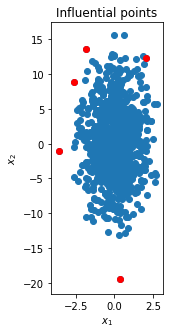

In [28]:
plt.figure(figsize=(2, 5))
plt.scatter(x1, x2)
plt.scatter(x1[influential_pts_fixed], x2[influential_pts_fixed], c='r')
    
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Influential points")

Impact on β1

$$
\hat{\beta}-\hat{\beta}_{(i)}=\underbrace{\frac{\left(X_{(i)}^{\prime}X_{(i)}\right)^{-1}x_{i}}{1+x_{i}^{\prime}\left(X_{(i)}^{\prime}X_{(i)}\right)^{-1}x_{i}}}\left(y_{i}-x_{i}^{\prime}\hat{\beta}_{(i)}\right)
$$

In [29]:
impact = np.empty(N)
for i in range(N):
    X_tilde[:i, 1] = x1[:i]
    X_tilde[i:, 1] = x1[i+1:]
    X_tilde[:i, 2] = x2[:i]
    X_tilde[i:, 2] = x2[i+1:]
    
    prod = np.linalg.inv(X_tilde.T @ X_tilde) @ X[i, :].T
    ratio = prod[1] / (1 + X[i, :].T @ prod)
    impact[i] = ratio

In [30]:
influential_pts_fixed_x1 = sorted(range(1000), key=lambda x: impact[x], reverse=True)[:5]

Text(0.5,1,'Influential points')

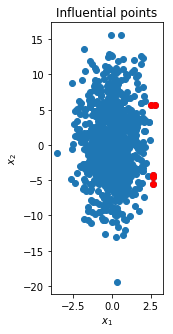

In [31]:
plt.figure(figsize=(2, 5))
plt.scatter(x1, x2)
plt.scatter(x1[influential_pts_fixed_x1], x2[influential_pts_fixed_x1], c='r')
    
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Influential points")